# 0. Librerías

In [49]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [50]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport



# 1. Carga de datos

In [51]:
df_lexp= pd.read_csv("content/data/lexp/Life Expectancy Data.csv")

- Variable dependiente: Life expectancy
- Variables independientes: (5)

# 2. Preprocesamiento

In [52]:
# Normalización y estandarización
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn import preprocessing

# Nan Values
from sklearn.impute import SimpleImputer

# Para Train y Test
from sklearn.model_selection import train_test_split

In [53]:
df_lexp.head()

le = preprocessing.LabelEncoder()
country = df_lexp['Country']
status = df_lexp['Status']
enc_status = le.fit_transform(status).reshape(-1,1)
enc_country = le.fit_transform(country).reshape(-1,1)   
df_lexp["Enc_status"] = enc_status
df_lexp["Enc_country"] = enc_country
df_lexp = df_lexp.drop(['Country','Status'], axis=1)
df_lexp

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Enc_status,Enc_country
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,192
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,192
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,192
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,192


Limpieza de column names (Espacios y mayusculas)

In [54]:
df_lexp
print(df_lexp.isnull().sum())
# Tenemos muchas columnas con Nan, asi que se crearon dos copias para separar la eliminacion de datos segun el problema: Prediccion o Clasificacion

df_regr = df_lexp.copy()
df_clas = df_lexp.copy()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Enc_status                           0
Enc_country                          0
dtype: int64


# Parte 1: Regresión

Borramos la fila completa de aquellos registros que tengan un valor nan en las columnas de interes:

In [55]:

## Probamos con dropear GDP
df_regr.dropna(subset=['Hepatitis B'], inplace=True)

print(df_regr.isnull().sum())
print(df_regr.shape)

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            171
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                14
under-five deaths                    0
Polio                                0
Total expenditure                  189
Diphtheria                           0
 HIV/AIDS                            0
GDP                                371
Population                         581
 thinness  1-19 years               14
 thinness 5-9 years                 14
Income composition of resources    123
Schooling                          119
Enc_status                           0
Enc_country                          0
dtype: int64
(2385, 22)


### 0. X e Y sets

1. Elija como variable dependiente: “Life Expectancy”, y como variables independientes 5 variables a su elección. Considere estas variables para realizar los siguientes puntos 2, 3 y 4.

In [57]:
X = df_regr.drop(columns=['Life expectancy '])  # Input features, all columns except 'Status'
Y = df_regr['Life expectancy ']  # Output variable, 'life expectancy ' column

# Assuming numeric columns in X need to be standardized
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

## 1. Regresión lineal


2. Realice regresión lineal considerando las variables independientes para estimar la variable dependiente (Life expectancy). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.

## 2. Regresión Lasso

3. Realice regresión Lasso considerando las variables independientes para estimar la variable dependiente (Life expectancy). Divida en training set y testing set. Obtenga las métricas de rendimiento vista en clases. Además, obtenga los coeficientes de regresión y explique cuáles variables fueron consideradas en la regresión y cuáles no.


## 3. Árbol de Regresión


4. Realice regresión mediante árbol de regresión considerando las variables independientes para estimar la variable dependiente (Life expectancy). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.

# Parte 2: Clasificación

### 0. X e Y sets

1. Elija como variable dependiente: “Status”, y como variables independientes al menos 10 variables a su elección. Considere estas variables para realizar los siguientes puntos 2, 3 y 4. Si fuese necesario, realice: encodeo, normalización, estandarización, imputación, etc.

In [ ]:
X = df_lexp.drop(columns=['Enc_status'])  # Input features, all columns except 'Status'
Y = df_lexp['Enc_status']  # Output variable, 'Status' column



X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)


### 1. KNN

2. Realice clasificación usando el algoritmo K-NN considerando las variables independientes para estimar la variable dependiente (Status). Divida en training set y testing set. Obtenga las métricas de rendimiento vistas en clases.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
k = 5  # Number of neighbors to consider (can be adjusted)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_classifier.fit(X_train, Y_train)

# Predict 'Status' on the test set
Y_pred = knn_classifier.predict(X_test)


Exception in thread Thread-8 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\n3mes\miniconda3\envs\DataScience\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\n3mes\miniconda3\envs\DataScience\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\n3mes\miniconda3\envs\DataScience\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.wa

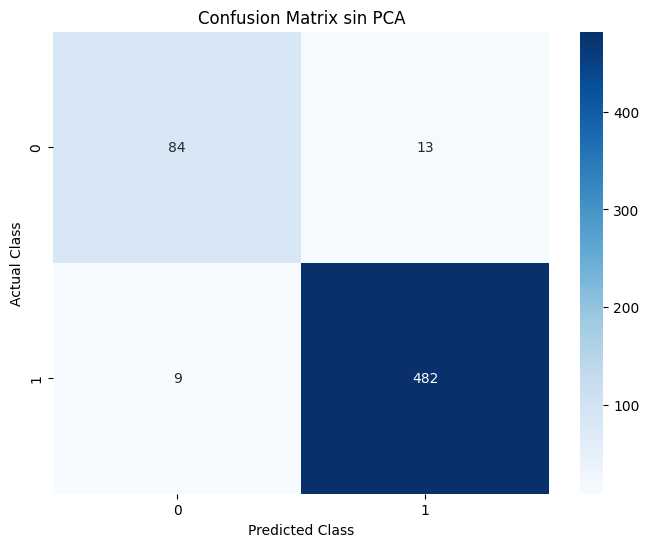


Accuracy: 0.9625850340136054


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)

acurracy_2 = accuracy_score(Y_test, Y_pred)

# Get the class labels from the 'Status' column
class_labels = np.unique(Y_train)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix sin PCA')
plt.show()

print("\nAccuracy:", acurracy_2)



## usando PCA

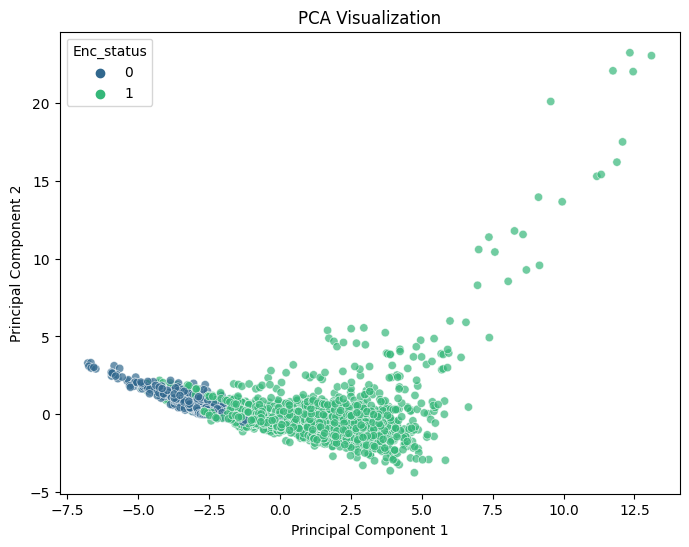

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a DataFrame named 'df'
# Separate the dependent variable 'Status' from the independent variables 'X'
X = df_lexp.drop(columns=['Enc_status'])
Y = df_lexp['Enc_status']

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and add the 'Status' column
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Enc_status'] = Y

# Visualize the data in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Enc_status', data=pca_df, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
k = 5  # Number of neighbors to consider (can be adjusted)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_classifier.fit(X_train_pca, Y_train_pca)

# Predict 'Status' on the test set
Y_pred_pca = knn_classifier.predict(X_test_pca)


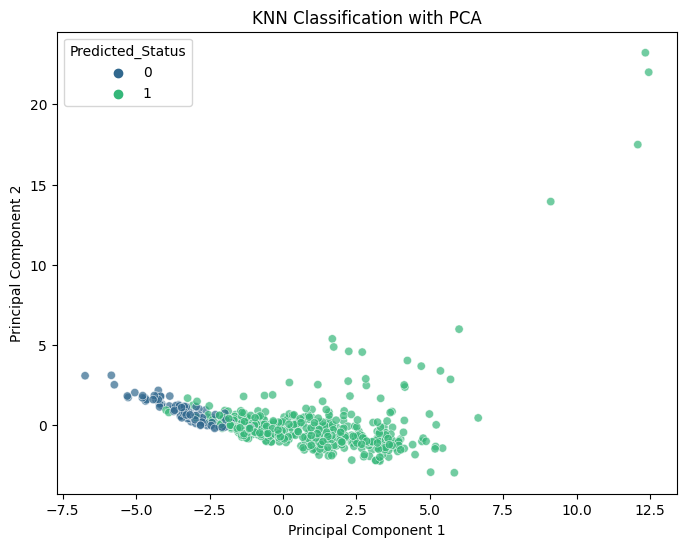

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the PCA-transformed data and predicted class labels
pca_result_df = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])
pca_result_df['Predicted_Status'] = Y_pred_pca

# Visualize the data in a scatter plot with the predicted classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Status', data=pca_result_df, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Classification with PCA')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate the confusion matrix
confusion_mat = confusion_matrix(Y_test_pca, Y_pred_pca)

# Calculate accuracy
accuracy = accuracy_score(Y_test_pca, Y_pred_pca)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(Y_test_pca, Y_pred_pca, average=None)
recall = recall_score(Y_test_pca, Y_pred_pca, average=None)
f1 = f1_score(Y_test_pca, Y_pred_pca, average=None)

# Display the results
print("Confusion Matrix:")
print(confusion_mat)
print("\nAccuracy:", accuracy)

# Print precision, recall, and F1-score for each class
for idx, class_label in enumerate(np.unique(Y_test)):
    print(f"\nClass: {class_label}")
    print(f"Precision: {precision[idx]}")
    print(f"Recall: {recall[idx]}")
    print(f"F1-score: {f1[idx]}")


Confusion Matrix:
[[ 75  22]
 [ 25 466]]

Accuracy: 0.9200680272108843

Class: 0
Precision: 0.75
Recall: 0.7731958762886598
F1-score: 0.7614213197969544

Class: 1
Precision: 0.9549180327868853
Recall: 0.9490835030549898
F1-score: 0.9519918283963228
